In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Project

/content/drive/MyDrive/Project


In [ ]:
ls

1905.03375.pdf  daisyRec/


In [ ]:
cd daisyRec/

/content/drive/MyDrive/Project/daisyRec


In [ ]:
ls

daisy/  images/  log/       README.md         res/      test.py  tune_res/
data/   LICENSE  model.pkl  requirements.txt  setup.py  tune.py  Untitled.ipynb


In [ ]:
!pip3 install optuna 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip3 install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python3 tune.py

Streaming output truncated to the last 5000 lines.
Forward algorithm decoder
[Epoch 015]: 100% 1/1 [00:00<00:00,  5.55it/s]
[Epoch 016]:   0% 0/1 [00:00<?, ?it/s]Forward algorithm matrix after encoding
Forward algorithm mean tensor([[ 0.0859,  0.1161,  0.0016,  ..., -0.0525,  0.0160,  0.0011],
        [ 0.0125, -0.0088, -0.0555,  ..., -0.1308, -0.0703,  0.1385],
        [ 0.0128,  0.0195,  0.1037,  ..., -0.0558, -0.0326,  0.0298],
        ...,
        [ 0.0004, -0.0004, -0.0013,  ..., -0.0004,  0.0005, -0.0004],
        [-0.0067,  0.0415, -0.0242,  ...,  0.0128,  0.0107,  0.0124],
        [ 0.0401, -0.0004,  0.0923,  ..., -0.0905,  0.0345, -0.0275]],
       grad_fn=<SliceBackward0>)
Forward algorithm reparameterise
Forward algorithm decoder
[Epoch 016]: 100% 1/1 [00:00<00:00,  5.94it/s]
[Epoch 017]:   0% 0/1 [00:00<?, ?it/s]Forward algorithm matrix after encoding
Forward algorithm mean tensor([[ 0.0838, -0.0220,  0.0369,  ...,  0.0289,  0.0403,  0.0169],
        [-0.1028,  0.0846, -0.0

In [ ]:
cd tune_res

/content/drive/MyDrive/Project/daisyRec/tune_res


best_params_BPR_ease_ml-100k_10filter_tsbr.csv
best_params_BPR_mf_ml-100k_10filter_tsbr.csv
best_params_BPR_multi-vae_amazon-electronic_10filter_tsbr.csv
best_params_BPR_multi-vae_ml-100k_10filter_tsbr.csv
best_params_LD_BPR_multi-vae_amazon-electronic_10filter_tsbr.csv
best_params_LD_BPR_multi-vae_ml-100k_10filter_tsbr.csv


In [ ]:
import pandas as pd

In [ ]:
amaLD=pd.read_csv("best_params_BPR_multi-vae_amazon-electronic_10filter_tsbr.csv")

In [ ]:
amaLD

,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
0,32,0.5,256,0.001,0.2,0.1323
1,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
2,64,0.5,256,0.001,0.2,0.1400
3,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
4,128,0.5,256,0.001,0.2,0.1209
5,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
6,128,0.5,256,0.01,0.2,0.1736
7,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
8,64,0.5,256,0.01,0.2,0.1761


In [ ]:
amaLD.latent_dim.unique

<bound method Series.unique of 0            32
1    latent_dim
2            64
3    latent_dim
4           128
5    latent_dim
6           128
7    latent_dim
8            64
Name: latent_dim, dtype: object>

In [ ]:
amaLD=amaLD[amaLD.latent_dim !='latent_dim']

In [ ]:
amaLD=amaLD.drop_duplicates()

In [ ]:
amaLD2=amaLD[amaLD.lr!='0.01']

In [ ]:
amaLD2

,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
0,32,0.5,256,0.001,0.2,0.1323
2,64,0.5,256,0.001,0.2,0.1400
4,128,0.5,256,0.001,0.2,0.1209


In [ ]:
import matplotlib.pyplot as plt

In [ ]:

amaLD2.ndcg=amaLD2.ndcg.astype(float)

<ipython-input-39-c88db1ad98dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amaLD2.ndcg=amaLD2.ndcg.astype(float)


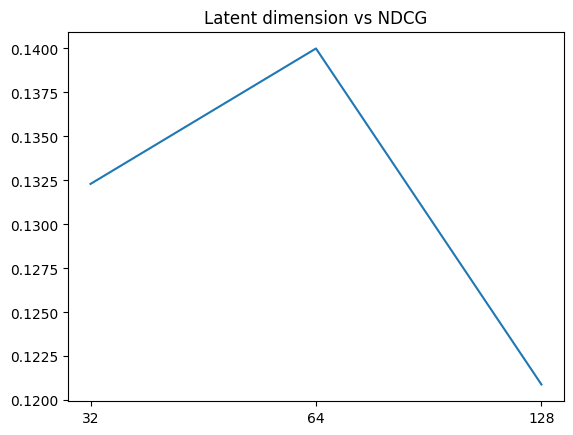

In [ ]:
fig, ax = plt.subplots()
ax.plot(amaLD2['latent_dim'], amaLD2['ndcg'])
ax.set_title('Latent dimension vs NDCG')
plt.show()

In [ ]:
amaLR=pd.read_csv("best_params_LD_BPR_multi-vae_amazon-electronic_10filter_tsbr.csv")

In [ ]:
amaLR=amaLR[amaLR.latent_dim !='latent_dim']

In [ ]:
amaLR=amaLR.astype(float)

In [ ]:
amaLR=amaLR.drop_duplicates()

In [ ]:
amaLR

,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
0,128.0,0.5,256.0,1.000000e-02,0.2,0.1736
2,128.0,0.5,256.0,1.000000e-03,0.2,0.1209
6,128.0,0.5,256.0,1.000000e-04,0.2,0.1172
9,128.0,0.5,256.0,1.000000e-05,0.2,0.1176
11,128.0,0.5,256.0,1.000000e-06,0.2,0.1176
13,128.0,0.5,256.0,1.000000e-07,0.2,0.1176


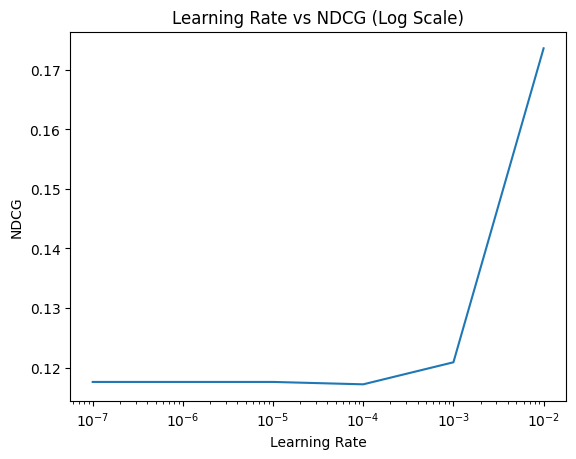

In [ ]:
plt.semilogx(amaLR['lr'], amaLR['ndcg'])
plt.xlabel('Learning Rate')
plt.ylabel('NDCG')
plt.title('Learning Rate vs NDCG (Log Scale)')
plt.show()

In [ ]:
#If your NGCD (normalized gradient coordinate descent) value remains the same for different dropout rates, it may indicate that the dropout regularization technique is not having a significant impact on the training process.

